### Шаг 1 и 2. Открываю файлы с данными, изучаю общую информацию, предобрабатываю данные

In [3]:
import pandas as pd
import matplotlib as mplt
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('/datasets/games.csv')
data.info()
data.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Таблица содержит 11 столбцов с информацией по продажам игр по платформам и регионам.

In [4]:
data = data.rename(columns = str.lower) #привожу названия столбцов к нижнему регистру
data.duplicated().sum()
data['platform'].unique()
data.describe()

#Здесь привожу значения с неуказанным рейтингом пользователей к нулевым
data.loc[data['user_score'] == 'tbd','user_score'] = float('nan')
#теперь можно привести значения с оценкой пользователей к float, т.к рейтинг от пользователей является средним значением
data['user_score'] = data['user_score'].astype('float')


data['rating'] = data['rating'].astype('str')
#меняю нулевые значения рейтинга для увеличения выборки
data['rating'] = data['rating'].str.replace('nan', 'Undefined')

#убираю оставшиеся нулевые значения 
data = data.dropna(subset=['rating', 'user_score', 'critic_score', 'year_of_release'])
#столбец с датой входа игры привожу к целочисленным значениям(т.к. имеем только год релиза)
data['year_of_release'] = data['year_of_release'].astype('int')

data.isnull().sum()
#сздаю столбец с подсчитанными суммарными продажами для игры
data['all_sales'] = data['eu_sales'] + data['jp_sales'] + data['other_sales'] + data['na_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16673,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,0.01,0.00,0.00,0.00,81.0,8.8,M,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01


В данной таблице нулевые значения(особенно в рейтингах) могли появиться по причине неизвестности игр и и отсутствия представленности на крупных игровых выставках в соответствующих годах.

### Шаг 3. Исследовательский анализ данных

In [5]:
games_per_year = data.pivot_table(index='year_of_release', aggfunc='count')['name']
games_per_year

year_of_release
1985      1
1988      1
1992      1
1994      1
1996      8
1997     14
1998     26
1999     30
2000    102
2001    256
2002    455
2003    499
2004    477
2005    562
2006    528
2007    590
2008    595
2009    554
2010    431
2011    466
2012    321
2013    272
2014    256
2015    221
2016    227
Name: name, dtype: int64

Выше можно рассмотреть количество выпущенных игр за разные периоды. На рассвете игроиндустрии сами игры не являлись столь доступными для рядового человека, но со временем ,становлясь все более признанной частью поп-культуры, игры стали выпускаться чаще(спрос породил предложение).

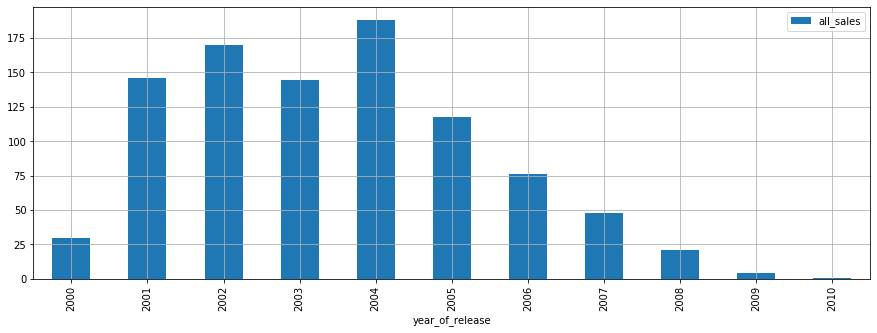

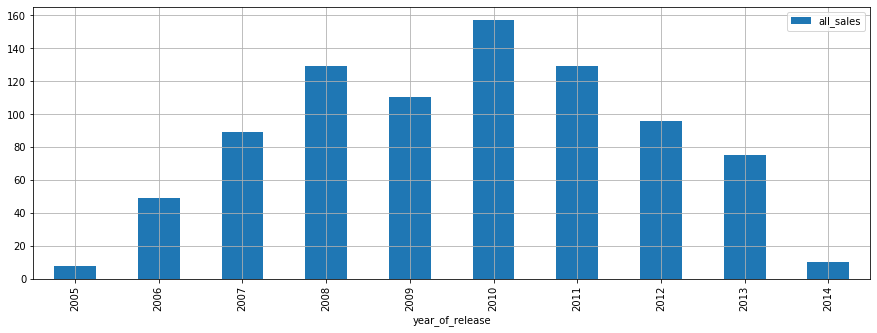

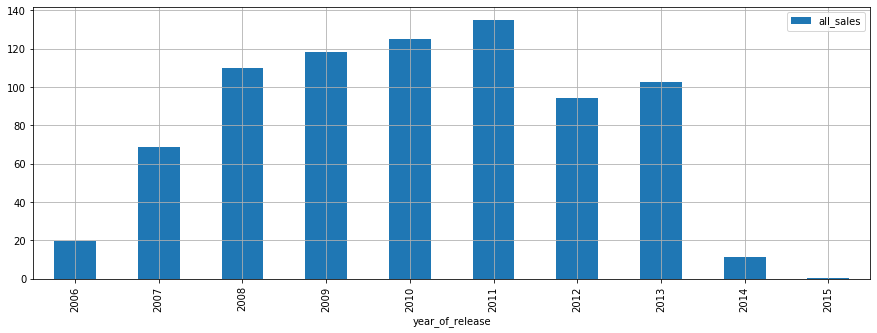

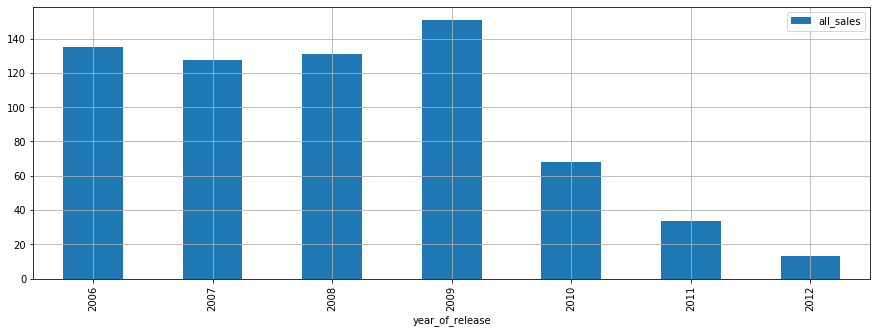

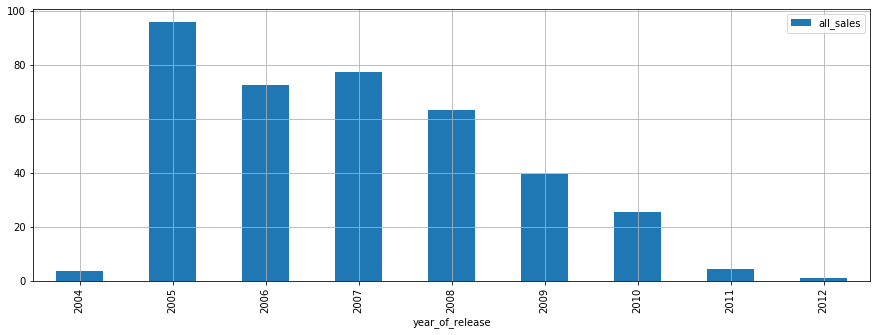

In [6]:
sales_per_platform = data.pivot_table(index='platform', values = 'all_sales' ,aggfunc='sum')
sales_per_platform = sales_per_platform.sort_values(by = 'all_sales',ascending = False)
sales_per_platform.describe()

top_platforms = sales_per_platform[sales_per_platform['all_sales']>300]
top_platforms

for platform in top_platforms.index:
    data[data['platform']== platform].\
    pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc = sum).\
    plot(kind ='bar' ,grid = True, figsize=(15, 5))
#выбираем период 4 года    

#PS2	946.01
#X360	853.67
#PS3	785.44
#Wii	659.23
#DS	382.88
#PS4	244.27
#XB	212.22
#PS	209.98
#PC	189.85
#PSP	187.68

#sales_per_year = data.query('platform == "PC" & platform == "Wii"').pivot_table(index='year_of_release', values = 'all_sales' ,columns = 'platform',aggfunc='sum')
#sales_per_year

На диаграммах топ платформ выше можно отметить, что срок в 4 года является определяющим для "жизни" консоли на рынке.
Далее можно наблюдать смену поколений для соответствующих платформ.


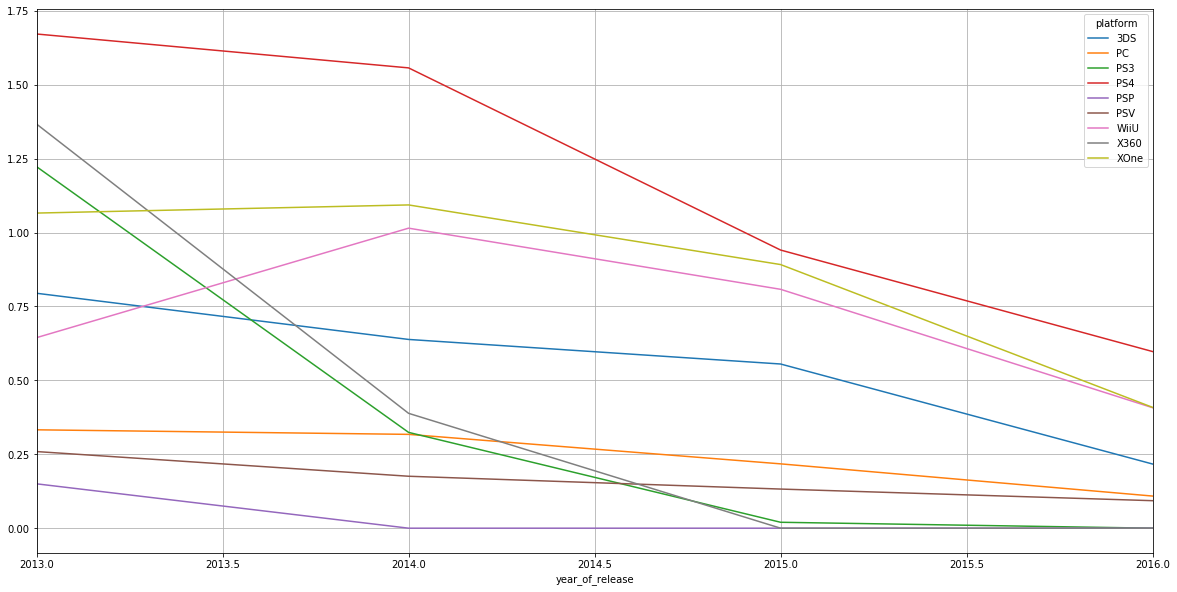

In [7]:
data['year_of_release'].unique()

#Актуальным периодом предлагаю считать последние 4 года в доступных данных
data_recent = data.query('year_of_release > 2012')

data_recent_pivot = data_recent.pivot_table(index = 'year_of_release', columns = 'platform', values = 'all_sales')
data_recent_pivot = data_recent_pivot.fillna(0)
data_recent_pivot.plot(grid = True, figsize=(20, 10))

#PC, PS4,Xone, WiiU, 3DS

Как можно отметить по графику выше, доходность каждой платформы со временем снижается, поэтому предлагаю брать за основу топовые модели по продажам, а именно:

PS4, XOne, WiiU, 3DS, PC

In [8]:
#Функция для построение boxplot'ов
def make_boxplot(platform):
    data_recent[data_recent['platform']== platform].\
    pivot_table(index = 'name', values = 'all_sales', aggfunc = 'sum',columns = 'year_of_release').\
    boxplot()  

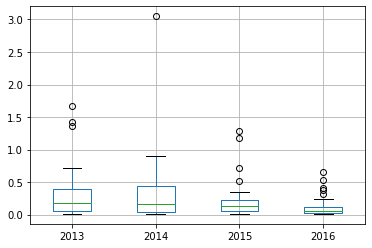

In [9]:
make_boxplot('PC')

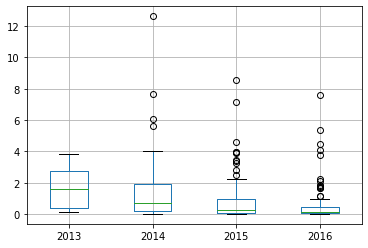

In [10]:
make_boxplot('PS4')

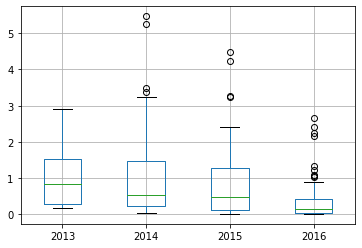

In [11]:
make_boxplot('XOne')

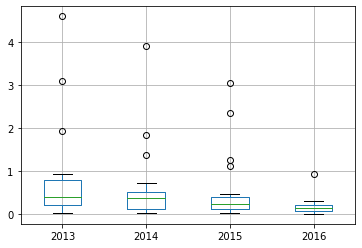

In [12]:
make_boxplot('3DS')

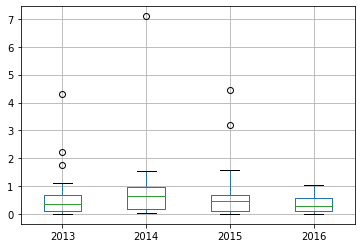

In [13]:
make_boxplot('WiiU')

Становится ясно, что разница в продажах между топ платормами довольно существенна(например PS4,WiiU), у PC самые низкие продажи, что является причиной частого пиратства игровых копий и отсутствия значимых для фанатов экслюзивов.

Отмечу, что уровень средних продаж примерно одинаков(выделяется лишь PS4), думаю, что это связанно с кроссплатформерностью многих тайтлов.

-0.03362497596528877
0.4058948014583669


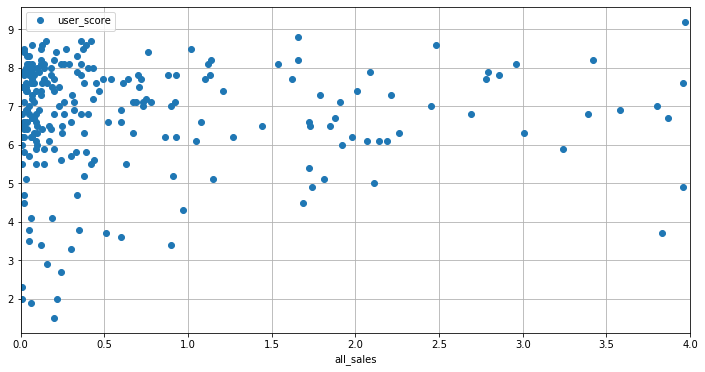

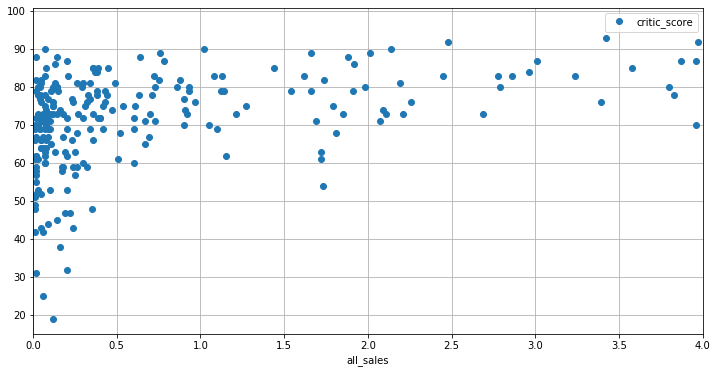

In [14]:
data_recent[data_recent['platform'] == 'PS4'].plot(x='all_sales', y='user_score', 
             style='o', grid=True, figsize=(12, 6))
plt.xlim(0,4)

data_recent[data_recent['platform'] == 'PS4'].plot(x='all_sales', y='critic_score', 
             style='o', grid=True, figsize=(12, 6))
plt.xlim(0,4)

print(data_recent[data_recent['platform'] == 'PS4']['all_sales'].corr(data['user_score']))
print(data_recent[data_recent['platform'] == 'PS4']['all_sales'].corr(data['critic_score']))

Для продаж на PS4 более значимымы отзывами являются отзывы критиков об игре, но тяжело назвать это определяющим фактором для пользователя при покупке.

-0.1092350273617178
0.19412407903472953


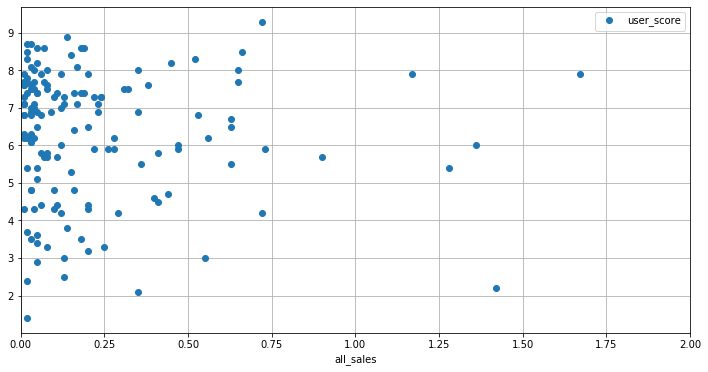

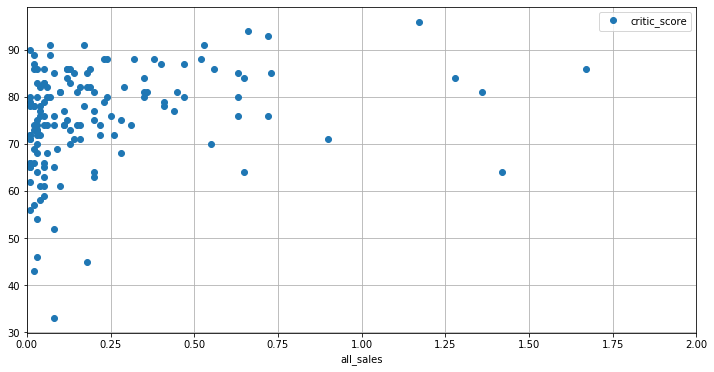

In [17]:
data_recent[data_recent['platform'] == 'PC'].plot(x='all_sales', y='user_score', 
             style='o', grid=True, figsize=(12, 6))
plt.xlim(0,2)

data_recent[data_recent['platform'] == 'PC'].plot(x='all_sales', y='critic_score', 
             style='o', grid=True, figsize=(12, 6))
plt.xlim(0,2)

print(data_recent[data_recent['platform'] == 'PC']['all_sales'].corr(data['user_score']))
print(data_recent[data_recent['platform'] == 'PC']['all_sales'].corr(data['critic_score']))

Для продаж на PC оценки пользователей и критиков практически не имеют никакого значения при покупке.

-0.09400318326920852
0.4104220356129637


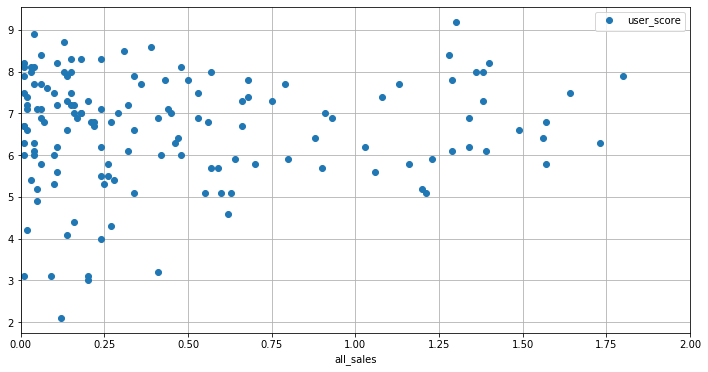

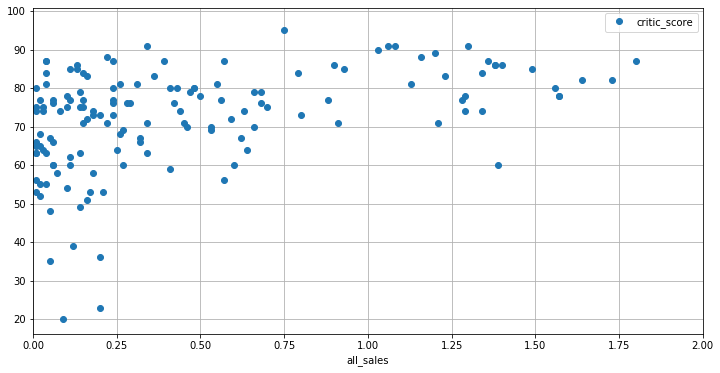

In [81]:
data_recent[data_recent['platform'] == 'XOne'].plot(x='all_sales', y='user_score', 
             style='o', grid=True, figsize=(12, 6))
plt.xlim(0,2)

data_recent[data_recent['platform'] == 'XOne'].plot(x='all_sales', y='critic_score', 
             style='o', grid=True, figsize=(12, 6))
plt.xlim(0,2)

print(data_recent[data_recent['platform'] == 'XOne']['all_sales'].corr(data['user_score']))
print(data_recent[data_recent['platform'] == 'XOne']['all_sales'].corr(data['critic_score']))

Для продаж на XOne, также, как и на PS4, более значимымы отзывами являются отзывы критиков об игре, но тяжело назвать это определяющим фактором для пользователя при покупке.

0.2729904366942444
0.33923492878531475


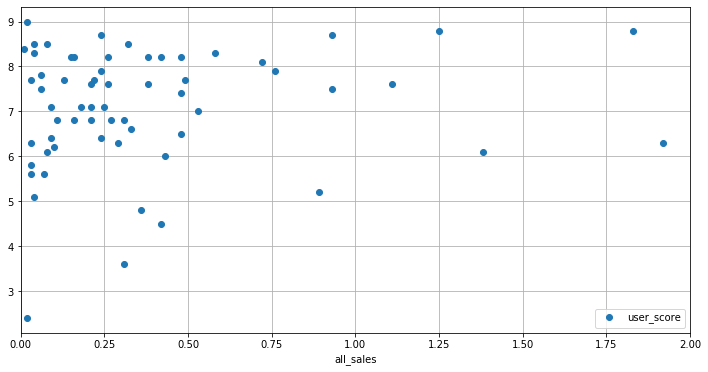

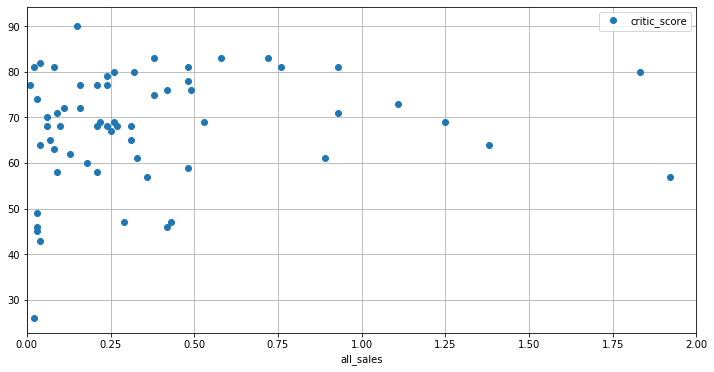

In [82]:
data_recent[data_recent['platform'] == '3DS'].plot(x='all_sales', y='user_score', 
             style='o', grid=True, figsize=(12, 6))
plt.xlim(0,2)

data_recent[data_recent['platform'] == '3DS'].plot(x='all_sales', y='critic_score', 
             style='o', grid=True, figsize=(12, 6))
plt.xlim(0,2)

print(data_recent[data_recent['platform'] == '3DS']['all_sales'].corr(data['user_score']))
print(data_recent[data_recent['platform'] == '3DS']['all_sales'].corr(data['critic_score']))

Для продаж на 3DS оценки пользователей и критиков практически не имеют никакого значения при покупке

0.4086917438492647
0.37950449899784144


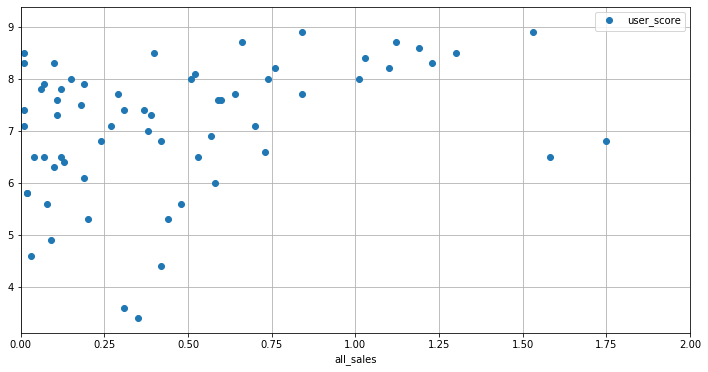

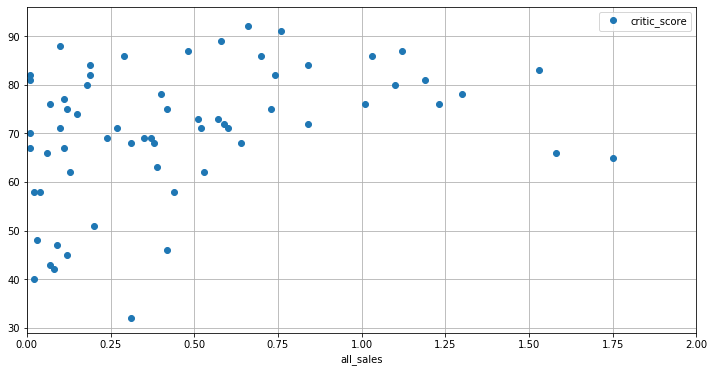

In [83]:
data_recent[data_recent['platform'] == 'WiiU'].plot(x='all_sales', y='user_score', 
             style='o', grid=True, figsize=(12, 6))
plt.xlim(0,2)

data_recent[data_recent['platform'] == 'WiiU'].plot(x='all_sales', y='critic_score', 
             style='o', grid=True, figsize=(12, 6))
plt.xlim(0,2)

print(data_recent[data_recent['platform'] == 'WiiU']['all_sales'].corr(data['user_score']))
print(data_recent[data_recent['platform'] == 'WiiU']['all_sales'].corr(data['critic_score']))

Для WiiU наиболее важнымы при покупке оказались отзывы пользователей, скорее всего это связано с особенностью платформы и при покупке больше принято полагаться именно на пользовательских экспириенс от игр.

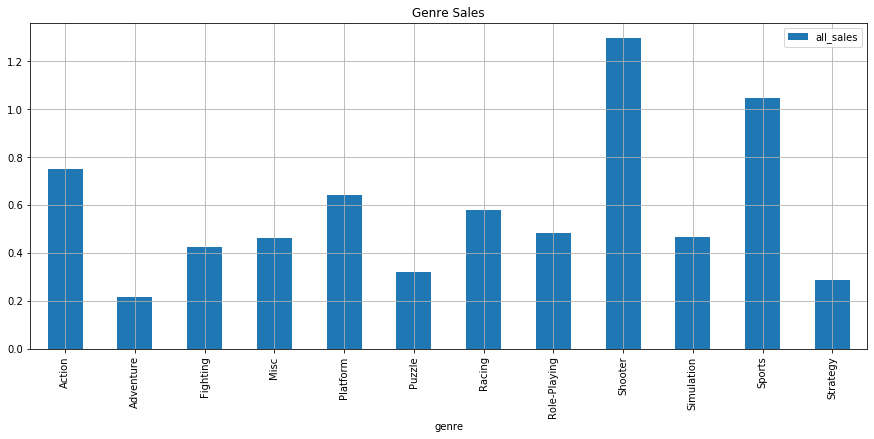

In [84]:
data_recent_genre = data_recent.pivot_table(index = 'genre', values = 'all_sales')
data_recent_genre.plot( kind = 'bar',  grid=True, figsize=(15, 6), title = "Genre Sales")


Самыми прибыльными жанрами (выше 0,5) являются Shooter, Sports, Action, Platform, Racing. 

Это можно объяснить низким порогом входимости для игрока и монетизациями внутри самих игр.

Тогда как такой жанр, как стратегии, например, нераспространен на консолях ввиду неудобства управления.

### Шаг 4. Портрет пользователя региона

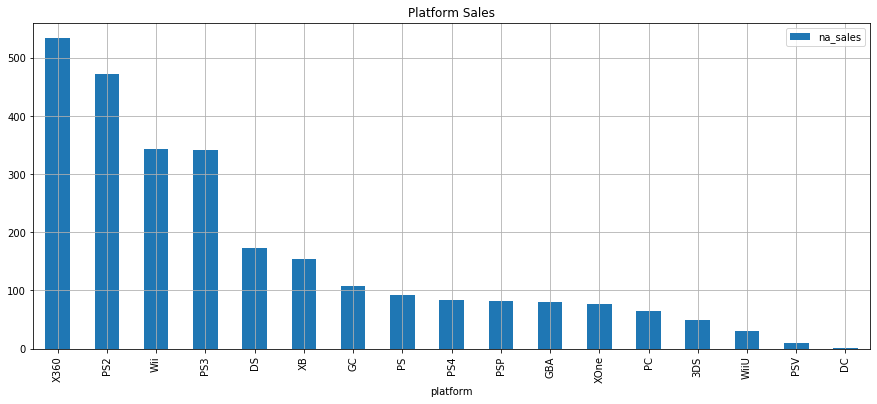

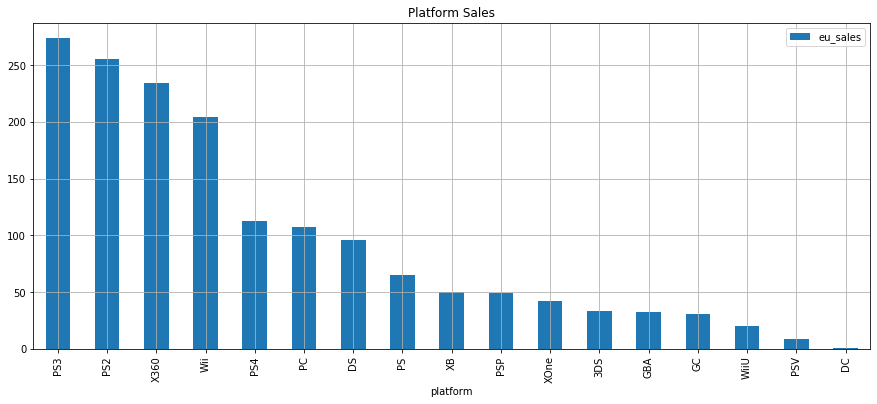

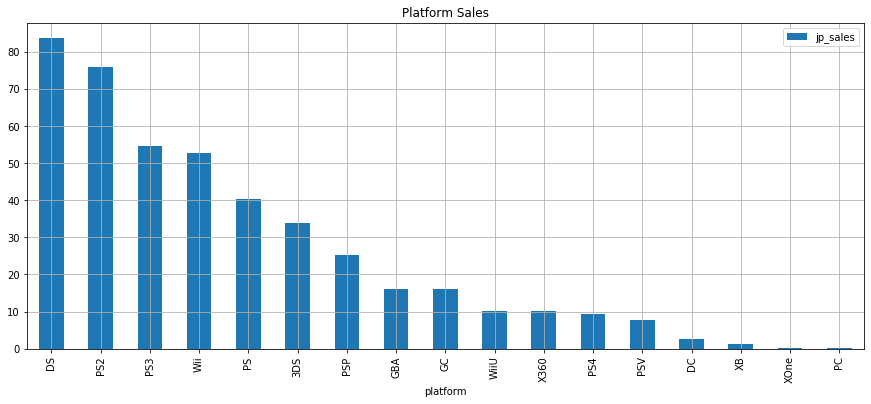

In [85]:
data_region_na = data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values( 'na_sales', ascending=False)
data_region_eu = data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values( 'eu_sales', ascending=False)
data_region_jp = data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values( 'jp_sales', ascending=False)

data_region_na.plot( kind = 'bar',  grid=True, figsize=(15, 6), title = "Platform Sales")
data_region_eu.plot( kind = 'bar',  grid=True, figsize=(15, 6), title = "Platform Sales")
data_region_jp.plot( kind = 'bar',  grid=True, figsize=(15, 6), title = "Platform Sales")

Различия в долях продаж обусловлены страной производителя платформы, Xbox от Microsoft доминирует на североамериканском рынке, 
Sony в японии.

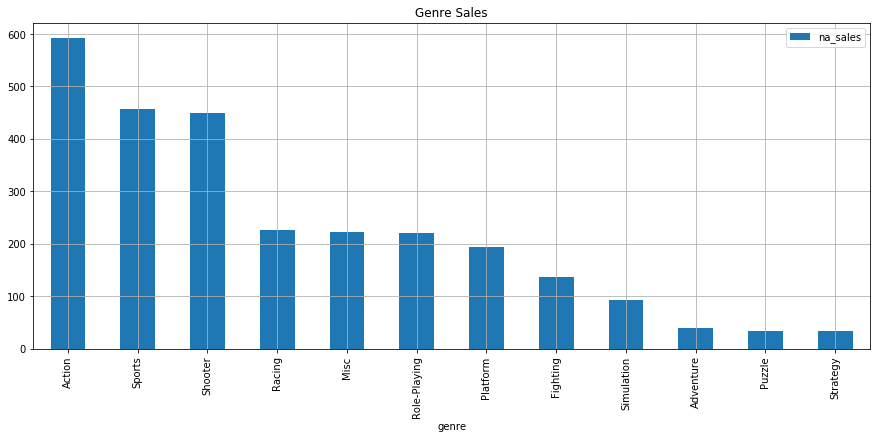

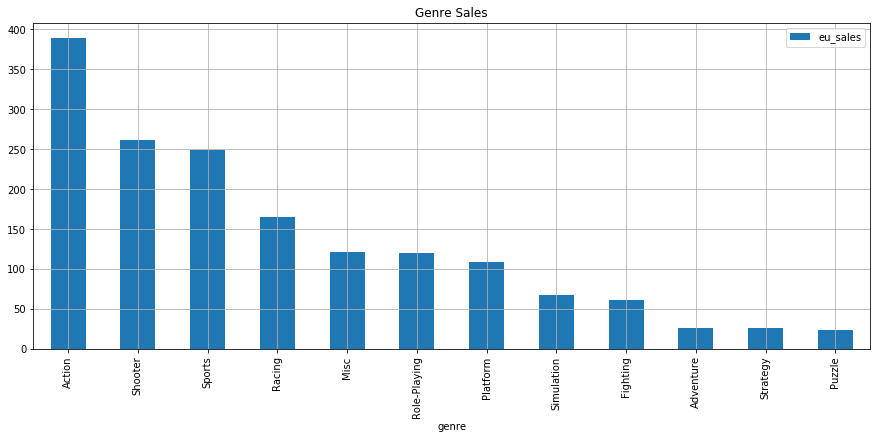

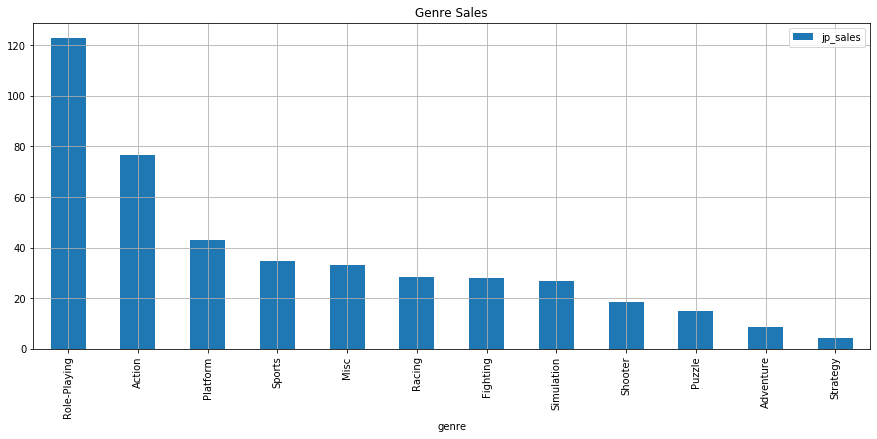

In [86]:
data_region_na = data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values( 'na_sales', ascending=False)
data_region_eu = data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values( 'eu_sales', ascending=False)
data_region_jp = data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values( 'jp_sales', ascending=False)

data_region_na.plot( kind = 'bar',  grid=True, figsize=(15, 6), title = "Genre Sales")
data_region_eu.plot( kind = 'bar',  grid=True, figsize=(15, 6), title = "Genre Sales")
data_region_jp.plot( kind = 'bar',  grid=True, figsize=(15, 6), title = "Genre Sales")

Для японского рынка историчекски сложилась такая популярность ролевых компьютерных игр, многочисленные игровые линейки в этом жанре, созданные в этой стране, завоевали множество наград и известность по всему миру.

В европе и северной америке  такие жанры, как спортивные и экшн игры доминируют из-за большой вовлеченнности населения в спорт в реальной жизни и количеством студий, которые занимаются разработкой именно экшн тайтлов.


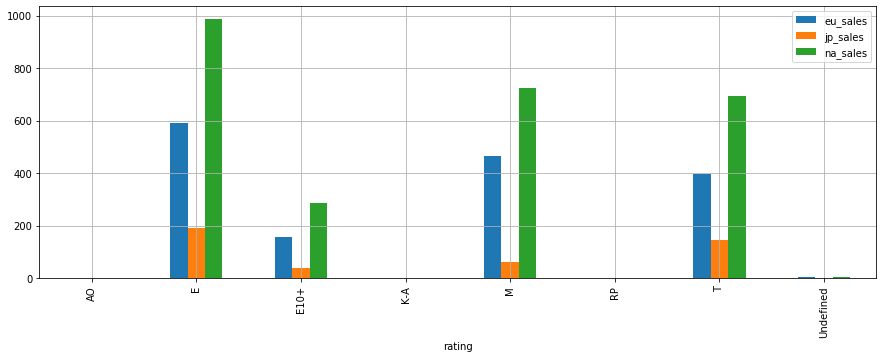

In [87]:
def rating(value):
    data.\
    pivot_table(index = 'rating', values = value, aggfunc = sum).\
    plot(kind ='bar' ,grid = True, figsize=(15, 5))
rating(['eu_sales', 'na_sales','jp_sales'])

Рейтинг ESRB оказывает влияние на продажи игры, едва ли в этом виноват сам рейтинг, просто возрастная аудитория игроков также неравномерно распределена.

## Шаг 5. Проверьте гипотезы

In [98]:
#Нулевая гипотеза заключается в том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые,
#Соответственно альтернативная шипотеза заключается в том,что они отличаются


#rating_count = data.pivot_table((index = , values = 'rating', columns = 'month' ).fillna(0))
#revenue_count_pivot = revenue_count_pivot.rename(columns={1: "January", 2: "February",3:"March",4:'April', 5:'May',6:'June',7:'July', 8:'August',9:'September', 10:'October', 11:'November', 12:'December'})
#data_full_sum_city = revenue_count.merge(data_users[['user_id', 'tariff','city']], on = ['user_id', 'tariff'], how = 'outer').fillna(0)
from scipy import stats as st
rating_count_xone = data.query('platform == "XOne"')
rating_count_pc = data.query('platform == "PC"')

alpha = .05

results = st.ttest_ind(
    rating_count_xone['user_score'], 
    rating_count_pc['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue  > alpha :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00010211482734739934
Не получилось отвергнуть нулевую гипотезу


In [96]:
#Нулевая гипотеза заключается в том, что средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
#Соответственно альтернативная шипотеза заключается в том,что они одинаковые

rating_count_action = data.query('genre == "Action"')
rating_count_sports = data.query('genre == "Sports"')

alpha = .05

results = st.ttest_ind(
    rating_count_action['user_score'], 
    rating_count_sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue  < alpha :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9785200320585197
Не получилось отвергнуть нулевую гипотезу


# Шаг 6. Общий вывод

Я провел анализ данных по  историческим данным о продажах игр, оценки пользователей и экспертов, жанры и платформы . Отмечу главные промежуточные выводы:

    1) В данных  нулевые значения(особенно в рейтингах) могли появиться по причине неизвестности игр и и отсутствия представленности на крупных игровых выставках в соответствующих годах.

    2) На рассвете игроиндустрии сами игры не являлись столь доступными для рядового человека, но со временем ,становлясь все более признанной частью поп-культуры, игры стали выпускаться чаще(спрос породил предложение).

    3) Срок в 4 года является определяющим для "жизни" консоли на рынке. Далее можно наблюдать смену поколений для соответствующих платформ.

    4) Разница в продажах между топ платормами довольно существенна(например PS4,WiiU), у PC самые низкие продажи, что является причиной частого пиратства игровых копий и отсутствия значимых для фанатов экслюзивов.Отмечу, что уровень средних продаж примерно одинаков(выделяется лишь PS4), думаю, что это связанно с кроссплатформерностью многих тайтлов.
    
    5) Самыми прибыльными жанрами (выше 0,5) являются Shooter, Sports, Action, Platform, Racing.Это можно объяснить низким порогом входимости для игрока и монетизациями внутри самих игр.Тогда как такой жанр, как стратегии, например, нераспространен на консолях ввиду неудобства управления.
    
    6) Для японского рынка историчекски сложилась такая популярность ролевых компьютерных игр, многочисленные игровые линейки в этом жанре, созданные в этой стране, завоевали множество наград и известность по всему миру.В европе и северной америке такие жанры, как спортивные и экшн игры доминируют из-за большой вовлеченнности населения в спорт в реальной жизни и количеством студий, которые занимаются разработкой именно экшн тайтлов.
    
    7) Рейтинг ESRB оказывает влияние на продажи игры, едва ли в этом виноват сам рейтинг, просто возрастная аудитория игроков также неравномерно распределена.
    
    8) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    
    9) Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
  